# Deteksi URL Phishing dan Ekstraksi Pola Ancaman dengan Model Bahasa IBM Granite

---


## Nama: Arif Cahyo Wibisono

## Topik: Data Classification and Summarization Using IBM Granite


In [ ]:
# 1. Instalasi library kaggle standar
print("Menginstal library kaggle...")
!pip install kaggle --quiet

Menginstal library kaggle...


In [ ]:
# 2. Impor library dan siapkan kredensial secara manual
import os
import json
import pandas as pd
import zipfile
from google.colab import userdata

print("Menyiapkan file kredensial kaggle.json...")
# Membuat direktori .kaggle jika belum ada
os.makedirs('/root/.kaggle', exist_ok=True)

Menyiapkan file kredensial kaggle.json...


In [ ]:
# Membuat file kaggle.json dari Colab Secrets
# Cara ini mengambil nilai yang sudah Anda simpan dan menuliskannya ke file
kaggle_creds = {
    'username': userdata.get('KAGGLE_USERNAME'),
    'key': userdata.get('KAGGLE_KEY')
}
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_creds, f)

# Mengatur izin file agar bisa dibaca oleh tool kaggle
!chmod 600 /root/.kaggle/kaggle.json
print("Kredensial berhasil disiapkan.")

Kredensial berhasil disiapkan.


In [ ]:
# Unduh dataset menggunakan Kaggle API
print("\nMengunduh dataset...")
# Perintah ini akan mengunduh dataset sebagai file ZIP
!kaggle datasets download -d ndarvind/phiusiil-phishing-url-dataset -p /content/


Mengunduh dataset...
Dataset URL: https://www.kaggle.com/datasets/ndarvind/phiusiil-phishing-url-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/14.7M [00:00<?, ?B/s]
100% 14.7M/14.7M [00:00<00:00, 1.00GB/s]


In [ ]:
# Unzip file dataset
zip_file_name = '/content/phiusiil-phishing-url-dataset.zip'
print(f"\nMengekstrak file {zip_file_name}...")
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Ekstraksi selesai.")


Mengekstrak file /content/phiusiil-phishing-url-dataset.zip...
Ekstraksi selesai.


In [ ]:
# Baca file CSV menggunakan Pandas
csv_file_name = "/content/PhiUSIIL_Phishing_URL_Dataset.csv"

print(f"\nMembaca file {csv_file_name} ke DataFrame...")
df = pd.read_csv(csv_file_name)

print("\n✅ Dataset berhasil dimuat dengan metode alternatif!")
display(df.head())


Membaca file /content/PhiUSIIL_Phishing_URL_Dataset.csv ke DataFrame...

✅ Dataset berhasil dimuat dengan metode alternatif!


,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 410.0 kB/s eta 0:00:00


In [ ]:
from langchain.llms import Replicate

# ambil api token dari colab
api_token = userdata.get("api_token")

# masukan token ke env var
os.environ["REPLICATE_API_TOKEN"] = api_token

In [ ]:
llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
)

In [ ]:
output = llm.invoke("Hello, my name is Arif Cahyo")
print(output)

Hello Arif Cahyo, it's nice to meet you. How can I assist you today?


In [ ]:
from langchain.prompts import PromptTemplate

In [ ]:
prompt_text = """
Analyze the following URL and classify it as either 'phishing' or 'legitimate'.
Provide only the label as the answer.

URL: {url}
Answer:"""

prompt_template = PromptTemplate(
    input_variables=["url"],
    template=prompt_text
)

In [ ]:
chain = prompt_template | llm

In [ ]:
sample_url = df['URL'].iloc[10]

print(f"Menguji klasifikasi untuk URL:\n{sample_url}\n")

# Menjalankan chain dengan memasukkan URL sampel
try:
    response = chain.invoke({"url": sample_url})
    print(f"Hasil Klasifikasi Model: {response}")

except Exception as e:
    print(f"Terjadi kesalahan: {e}")

Menguji klasifikasi untuk URL:
https://www.religionenlibertad.com

Hasil Klasifikasi Model: legitimate


In [ ]:
!pip install tqdm --quiet

from sklearn.metrics import accuracy_score, classification_report
from tqdm.auto import tqdm

In [ ]:
sample_size = 50
data_sample = df.sample(n=sample_size, random_state=42) # random_state agar hasilnya bisa diulang

# Siapkan list untuk menampung hasil prediksi
predictions = []

print(f"Memulai klasifikasi untuk {sample_size} URL sampel...")

Memulai klasifikasi untuk 50 URL sampel...


In [ ]:
for url in tqdm(data_sample['URL']):
    try:
        # Panggil chain yang sudah kita buat sebelumnya
        response = chain.invoke({"url": url})
        predictions.append(response)
    except Exception as e:
        # Jika ada error pada satu URL, catat sebagai 'error' dan lanjut
        predictions.append('error')
        print(f"Error pada URL: {url}, Error: {e}")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
data_sample['model_prediction'] = predictions

In [ ]:
# Bersihkan dan Standarisasi Hasil
data_sample['model_prediction'] = data_sample['model_prediction'].str.lower().str.strip()

label_mapping = {
    'phishing': 0,
    'legitimate': 1
}

# Buat kolom baru berisi prediksi dalam format angka
data_sample['prediction_numeric'] = data_sample['model_prediction'].map(label_mapping)

In [ ]:
# Hitung Akurasi
eval_data = data_sample.dropna(subset=['label', 'prediction_numeric'])

In [ ]:
accuracy = accuracy_score(eval_data['label'], eval_data['prediction_numeric'])
print(f"Akurasi Model pada Sampel: {accuracy:.2%}")

Akurasi Model pada Sampel: 86.05%


In [ ]:
# Tampilkan Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(eval_data['label'], eval_data['prediction_numeric']))


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.81      0.95      0.88        22

    accuracy                           0.86        43
   macro avg       0.87      0.86      0.86        43
weighted avg       0.87      0.86      0.86        43



In [ ]:
# Tampilkan beberapa contoh hasil untuk perbandingan
print("\nContoh Hasil Prediksi vs Label Asli:")
display(eval_data[['URL', 'label', 'model_prediction', 'prediction_numeric']].head())


Contoh Hasil Prediksi vs Label Asli:


,URL,label,model_prediction,prediction_numeric
136221,https://www.northcm.ac.th,1,legitimate,1.0
56609,https://unitedmartialartscenters.com/at0/mygov...,0,phishing,0.0
46393,https://email.mail1.onesignal.os.tc/c/ejwcz02u...,0,phishing,0.0
129746,http://uqr.to/1il1z,0,phishing,0.0
131464,https://www.woolworthsrewards.com.au,1,legitimate,1.0


In [ ]:
correctly_identified_phishing = eval_data[
    (eval_data['label'] == 0) & (eval_data['prediction_numeric'] == 0)
]

# Ubah ke dalam format list, dan gabungkan dengan koma
phishing_url_list = ", ".join(correctly_identified_phishing['URL'].tolist())

In [ ]:
# Buat Prompt Template untuk tugas Summarization
summarization_prompt_text = """
Based on the following list of phishing URLs, what common patterns or tactics do you observe?
Summarize your findings in a few clear, key points.

URL List:
{url_list}

Summary:
"""

summarization_prompt = PromptTemplate(
    input_variables=["url_list"],
    template=summarization_prompt_text
)

In [ ]:
# Buat Chain baru untuk Summarization
summarization_chain = summarization_prompt | llm

In [ ]:
# Jalankan chain dan dapatkan ringkasan insight
print("Meminta model untuk meringkas pola URL phishing...")

try:
    summary_insight = summarization_chain.invoke({"url_list": phishing_url_list})
    print("\n--- Insight dari Model AI ---")
    print(summary_insight)
except Exception as e:
    print(f"Terjadi kesalahan saat summarization: {e}")

Meminta model untuk meringkas pola URL phishing...

--- Insight dari Model AI ---
Key Observations on Phishing URL Tactics:

1. **Impersonation of Legitimate Organizations**: Many URLs attempt to mimic legitimate entities such as United Martial Arts Centers, OneSignal, Signals (email.mail1), Regruhosting, WordPress (wp-admin), Firebase, and various country-specific (.jo.mvcc.top, .africa) or generic top-level domains (.com, .org).

2. **Use of Subdomains and Complex Paths**: Phishing sites often use long, convoluted subdomains or paths to appear more legitimate or to bypass simple filters. Examples include the extensive path in the first URL and the multiple subdomains in others like id.repl.co and firebaseapp.com.

3. **Dynamic or Randomly Generated Domain Names**: Some URLs use randomly generated or encoded domain names (e.g., 5a4f2f89-da45-4791-8c6a-981093dbf158.id.repl.co) to evade detection by security systems that rely on blacklisting known malicious domains.

4. **Mimicry of Log

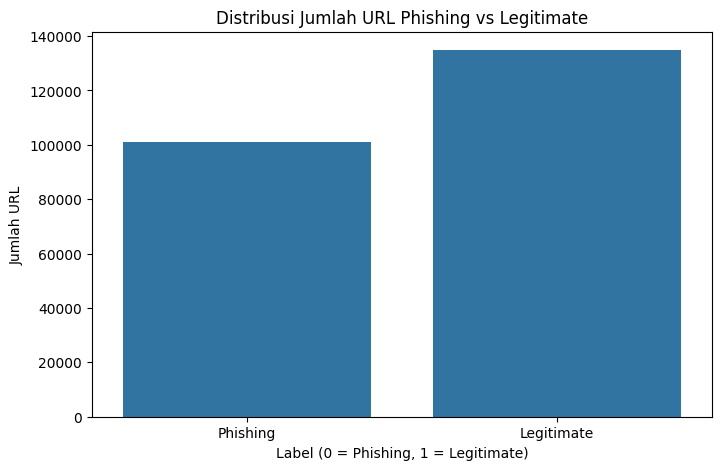

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribusi Jumlah URL Phishing vs Legitimate')
plt.xlabel('Label (0 = Phishing, 1 = Legitimate)')
plt.ylabel('Jumlah URL')
plt.xticks([0, 1], ['Phishing', 'Legitimate'])
plt.show()

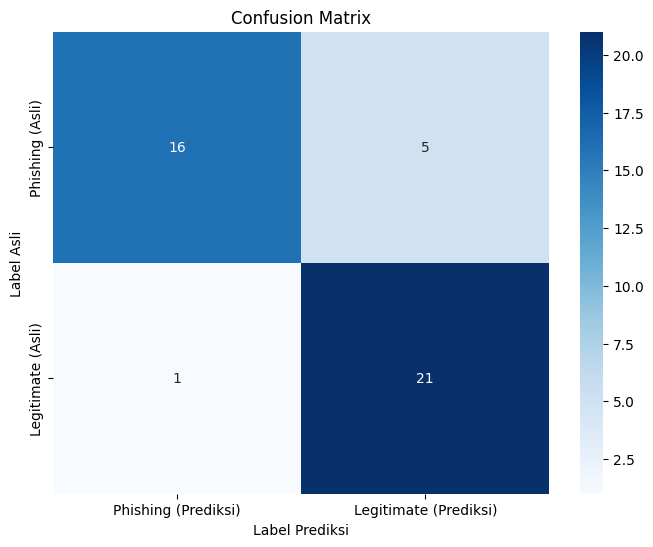

In [ ]:
from sklearn.metrics import confusion_matrix

# Ambil data dari hasil evaluasi sebelumnya
cm = confusion_matrix(eval_data['label'], eval_data['prediction_numeric'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Phishing (Prediksi)', 'Legitimate (Prediksi)'],
            yticklabels=['Phishing (Asli)', 'Legitimate (Asli)'])
plt.title('Confusion Matrix')
plt.ylabel('Label Asli')
plt.xlabel('Label Prediksi')
plt.show()

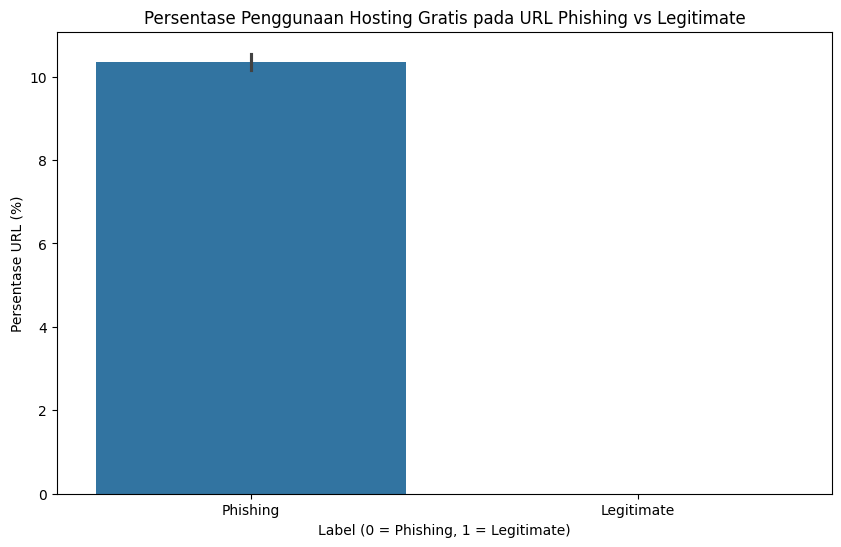

In [ ]:
# Daftar domain hosting gratis dari insight AI
free_hosting_keywords = ['.netlify.app', '.glitch.me', '.appspot.com', '.firebaseapp.com', 'repl.co']

# Fungsi untuk mengecek keberadaan keyword
def contains_keyword(url, keywords):
    for keyword in keywords:
        if keyword in url:
            return True
    return False

# Buat kolom baru untuk menandai penggunaan hosting gratis
df['uses_free_hosting'] = df['URL'].apply(lambda url: contains_keyword(url, free_hosting_keywords))

# Buat plot perbandingan
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='uses_free_hosting', data=df, estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Persentase Penggunaan Hosting Gratis pada URL Phishing vs Legitimate')
plt.xlabel('Label (0 = Phishing, 1 = Legitimate)')
plt.ylabel('Persentase URL (%)')
plt.xticks([0, 1], ['Phishing', 'Legitimate'])
plt.show()